In [10]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [11]:
def sliding_average(data, window_size):
    """Calculate the sliding (moving) average of a dataset with edge handling."""
    pad_width = window_size // 2
    padded_data = np.pad(data, pad_width, mode='edge')
    smoothed_data = np.convolve(padded_data, np.ones(window_size) / window_size, mode='valid')
    return smoothed_data

In [12]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [13]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [14]:
log = lammps_logfile.File("equilibrate.log")

timestep = 1 # fs
time = log.get("Step", run_num=1)*timestep/1000 # ps
Press = log.get("Press", run_num=1)/1000 # katm
deltaz = log.get("v_deltaz", run_num=1)/10 # nm 

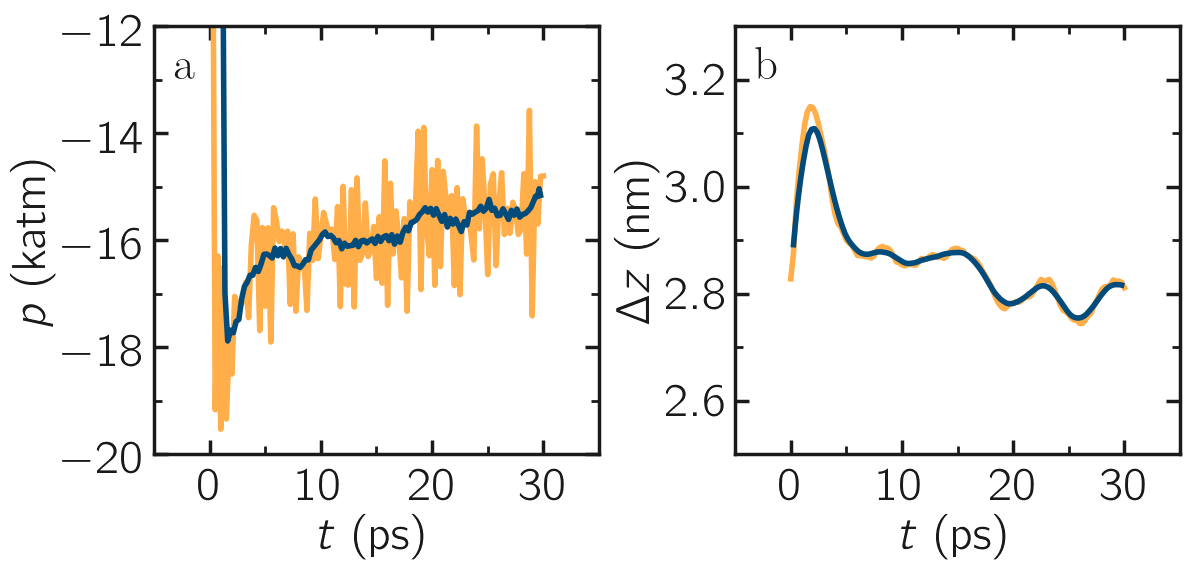

In [18]:
filename = "NANOSHEAR-equilibration"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5.8), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=2)

# Panel a
myplt.add_panel()
myplt.add_plot(x = time, y = Press, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color1, markersize = 12)
sPress = sliding_average(Press, 10)
stime = sliding_average(time, 10)
myplt.add_plot(x = stime, y = sPress, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.complete_panel(ylabel = r'$p ~ \mathrm{(katm)}$',
                     xlabel = r'$t~\mathrm{(ps)}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 31, 10), y_ticks=np.arange(-20, -10, 2),
                    x_boundaries=(-5, 35), y_boundaries=(-20, -12))

# Panel b
myplt.add_panel()
myplt.add_plot(x = time, y = deltaz, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color1, markersize = 12)
sdeltaz = sliding_average(deltaz, 10)
stime = sliding_average(time, 10)
myplt.add_plot(x = stime, y = sdeltaz, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.complete_panel(ylabel = r'$\Delta z ~ \mathrm{(nm)}$',
                     xlabel = r'$t~\mathrm{(ps)}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 31, 10), y_ticks=np.arange(2.6, 3.3, 0.2),
                    x_boundaries=(-5, 35), y_boundaries=(2.5, 3.3))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)